In [20]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1: Soil Physics Calculations

#### a. Soil Volume and Bulk Density

The volume of soil can be calculated with the following formula, where the unit of volume is cubic meters ($m^3$):

$$
\text{volume soil} = \pi \times (\text{cylinder radius})^2 \times \text{cylinder length}
$$

Plugging in the values:

$$
\text{volume soil} = \pi \times (0.03 \, m)^2 \times 0.15 \, m = 0.000424 \, m^3
$$

The bulk density of the soil, with units of kilograms per cubic meter ($kg/m^3$), is calculated as:

$$
\text{bulk density} = \frac{\text{mass soil}}{\text{volume soil}}
$$

$$
\text{bulk density} = \frac{0.540 \, kg}{0.000424 \, m^3} = 1273.24 \, kg/m^3
$$

#### b. Porosity

Porosity, which is a dimensionless quantity, can be calculated using:

$$
\text{porosity} = 1 - \left( \frac{\text{bulk density}}{\text{density soil minerals}} \right)
$$

$$
\text{porosity} = 1 - \left( \frac{1273.24 \, kg/m^3}{2650 \, kg/m^3} \right) = 0.52
$$

#### c. Volumetric Soil Moisture

- Mass of water ($kg$):

$$
\text{mass water} = \text{mass soil} - \text{mass soil oven dry}
$$

$$
\text{mass water} = 0.540 \, kg - 0.420 \, kg = 0.120 \, kg
$$

- Volume of water ($m^3$):

$$
\text{volume water} = \frac{\text{mass water}}{\text{density water}}
$$

$$
\text{volume water} = \frac{0.120 \, kg}{1000 \, kg/m^3} = 0.00012 \, m^3
$$

Then, the volumetric soil moisture ($m^3/m^3$) is given by:

$$
\text{volumetric soil moisture} = \frac{\text{volume water}}{\text{volume soil}}
$$

$$
\text{volumetric soil moisture} = \frac{0.00012 \, m^3}{0.000424 \, m^3} = 0.28 \, m^3/m^3
$$

#### d. Relative Saturation

- Volume of air in the soil ($m^3$):

$$
\text{volume air} = \text{volume soil} - \text{volume water} - \text{volume minerals}
$$

Since we know the volume of soil and water, we calculate the volume of minerals to find the air volume:

- Volume of minerals ($m^3$):

$$
\text{volume minerals} = \frac{\text{mass soil oven dry}}{\text{density soil minerals}}
$$

$$
\text{volume minerals} = \frac{0.420 \, kg}{2650 \, kg/m^3} = 0.000158 \, m^3
$$

$$
\text{volume air} = 0.000424 \, m^3 - 0.00012 \, m^3 - 0.000158 \, m^3 = 0.000146 \, m^3
$$

The relative saturation (dimensionless) is calculated as:

$$
\text{relative saturation} = \frac{\text{volume water}}{\text{volume water} + \text{volume air}}
$$

$$
\text{relative saturation} = \frac{0.00012 \, m^3}{0.00012 \, m^3 + 0.000146 \, m^3} = 0.45


In [32]:
cylinder_length = 0.15 # m
cylinder_radius = 0.03 # m
mass_soil = 0.540 #kg
mass_soil_oven_dry = 0.420 #kg
density_water = 1000 # kg/m^3
density_soil_minerals = 2650 # kg/m^3

#a
volume_soil = np.pi * cylinder_radius**2 * cylinder_length # m^3
bulk_density = mass_soil / volume_soil # kg/m^3

#b
porosity = 1 - (bulk_density / density_soil_minerals) # unitless

#c
mass_water = mass_soil - mass_soil_oven_dry # kg
volume_water = mass_water / density_water # m^3
mass_minerals = mass_soil_oven_dry # kg
volume_minerals = mass_minerals / density_soil_minerals # m^3
volumetric_soil_moisture = volume_water / volume_soil # m^3/m^3

#d
volume_air = volume_soil - volume_water - volume_minerals # m^3
relative_saturation = volume_water / (volume_water + volume_air) # unitless

print(f"a. bulk density: {bulk_density:.2f} kg/m^3")
print(f"b. porosity: {porosity:.2f}")
print(f"c. volumetric soil moisture: {volumetric_soil_moisture:.2f} m^3/m^3")
print(f"d. relative saturation: {relative_saturation:.2f}")



a. bulk density: 1273.24 kg/m^3
b. porosity: 0.52
c. volumetric soil moisture: 0.28 m^3/m^3
d. relative saturation: 0.45


### Problem 2
Soil Characteristics:  
a. What is the soil type at each site?  
b. What is the typical porosity for soil at site A and site B? Which soil has higher porosity? Which soil type would you expect to have larger pore spaces?  



In [35]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
class Soil():
    def __init__(self, porosity, b, K_s, psi_s):

        self.K_s = K_s # saturated hydraulic conductivity (cm/hr)
        self.psi_s = psi_s # matric head at saturation (cm)
        self.porosity = porosity # porosity is equal to saturated volumetric soil moisture (unitless)
        self.theta_star = porosity # saturated soil moisture is equal to porosity (volume / volume)
        self.b = b # Brooks-Corey parameter (unitless)
        self.psi = None # matric head (cm)
        self.theta = None # volumetric soil moisture (volume / volume)

    def calc_soil_moisture(self):
        # Calculate soil moisture, theta, using the Brooks-Corey model.
        return (self.psi / self.psi_s) ** (-1 / self.b) * self.theta_star

    def calc_matric_head(self, theta):
        #Calculate matric head, psi, using the Brooks-Corey model.
        return self.psi_s * (theta / self.theta_star) ** (-self.b)

    def calc_hydraulic_conductivity(self, theta):
        # Calculate hydraulic conductivity, K,  using the Brooks-Corey model.
        c = 2 * self.b + 3
        return self.K_s * (theta / self.theta_star) ** c

soil_A = Soil(porosity = 0.435, b = 4.90, K_s = 12.49, psi_s = -21.8) # values taken from sandy loam row of Table
soil_B = Soil(porosity = 0.483, b = 11.4, K_s = 0.46, psi_s = -40.5) # values taken from clay row of Table

psi_field_capacity = -340 # cm
psi_wilting_point = -15000 # cm

soil_A.psi = psi_field_capacity
soil_A.theta_field_capcity = soil_A.calc_soil_moisture()
soil_B.psi = psi_field_capacity
soil_B.theta_field_capcity = soil_B.calc_soil_moisture()

print("========================= 2c =========================")
print(f"soil moisture at field capacity for soil A, sandy loam: {soil_A.theta_field_capcity:.2f}")
print(f"soil moisture at field capacity for soil B, clay: {soil_B.theta_field_capcity:.2f}")

soil_A.psi = psi_wilting_point
soil_A.theta_wilting_point = soil_A.calc_soil_moisture()
soil_B.psi = psi_wilting_point
soil_B.theta_wilting_point = soil_B.calc_soil_moisture()

print("\n========================= 2d =========================")
print(f"soil moisture at wilting point for soil A, sandy loam: {soil_A.theta_wilting_point:.2f}")
print(f"soil moisture at wilting point for soil B, clay: {soil_B.theta_wilting_point:.2f}")

print(f"\nSaturated hydraulic conductivity for soil A, sandy loam: {soil_A.K_s:.2f} cm/hr")
print(f"Saturated hydraulic conductivity for soil B, clay: {soil_B.K_s:.2f} cm/hr")
print(f"Matric head at saturation for soil A, sandy loam: {soil_A.psi_s:.2f} cm")
print(f"Matric head at saturation for soil B, clay: {soil_B.psi_s:.2f} cm")





========================= 2c =========================
soil moisture at field capacity for soil A, sandy loam: 0.25
soil moisture at field capacity for soil B, clay: 0.40

========================= 2d =========================
soil moisture at wilting point for soil A, sandy loam: 0.11
soil moisture at wilting point for soil B, clay: 0.29

Saturated hydraulic conductivity for soil A, sandy loam: 12.49 cm/hr
Saturated hydraulic conductivity for soil B, clay: 0.46 cm/hr
Matric head at saturation for soil A, sandy loam: -21.80 cm
Matric head at saturation for soil B, clay: -40.50 cm



========================= 2e =========================


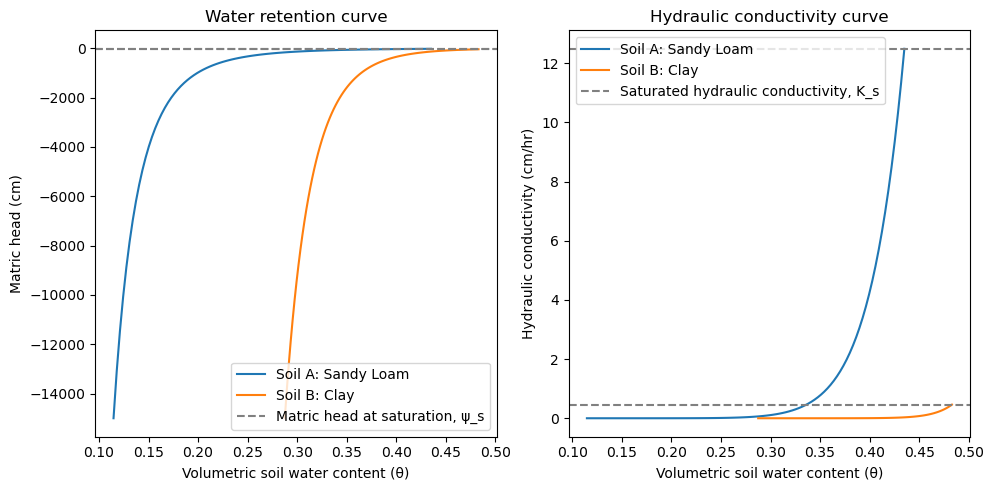

In [34]:
soil_A.theta_range = np.linspace(soil_A.theta_wilting_point, soil_A.theta_star, 100)
soil_A.psi_range = soil_A.calc_matric_head(soil_A.theta_range)
soil_A.K_range = soil_A.calc_hydraulic_conductivity(soil_A.theta_range)

soil_B.theta_range = np.linspace(soil_B.theta_wilting_point, soil_B.theta_star, 100)
soil_B.psi_range = soil_B.calc_matric_head(soil_B.theta_range)
soil_B.K_range = soil_B.calc_hydraulic_conductivity(soil_B.theta_range)

print("\n========================= 2e =========================")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(soil_A.theta_range, soil_A.psi_range, label="Soil A: Sandy Loam")
ax[0].plot(soil_B.theta_range, soil_B.psi_range, label="Soil B: Clay")
#Plot horizontal line at psi_s for each soil
ax[0].axhline(soil_A.psi_s, color="gray", linestyle="--", label="Matric head at saturation, \u03C8_s")
ax[0].axhline(soil_B.psi_s, color="gray", linestyle="--")
ax[0].set_xlabel("Volumetric soil water content (\u03B8)")
ax[0].set_ylabel("Matric head (cm)")
ax[0].set_title("Water retention curve")
ax[0].legend()
ax[1].plot(soil_A.theta_range, soil_A.K_range, label="Soil A: Sandy Loam")
ax[1].plot(soil_B.theta_range, soil_B.K_range, label="Soil B: Clay")
#Plot horizontal line at K_s for each soil
ax[1].axhline(soil_A.K_s, color="gray", linestyle="--", label="Saturated hydraulic conductivity, K_s")
ax[1].axhline(soil_B.K_s, color="gray", linestyle="--")
ax[1].set_xlabel("Volumetric soil water content (\u03B8)")
ax[1].set_ylabel("Hydraulic conductivity (cm/hr)")
ax[1].set_title("Hydraulic conductivity curve")
ax[1].legend()
plt.tight_layout()
plt.show()


#### f. Comparison of Field Capacity and Wilting Point

- **Field Capacity**: 
  - Soil A (Sandy Loam) has a field capacity at a soil moisture content of 0.25.
  - Soil B (Clay) has a higher field capacity at a soil moisture content of 0.40.
  
  Clay retains more water at field capacity than Sandy Loam, due to its finer particles and greater pore space that can hold water.

- **Wilting Point**:
  - Soil A (Sandy Loam) has a wilting point at a soil moisture content of 0.11.
  - Soil B (Clay) has a higher wilting point at 0.29.
  
  Clay soil retains more water at the wilting point, offering more available water to plants compared to Sandy Loam.

#### g. Hydraulic Conductivity and Matric Head Dynamics

- **Hydraulic Conductivity (K)**:
  Increases with soil moisture due to larger water-filled pore spaces. 
  - For Soil A (Sandy Loam), K increases significantly from nearly 0.00 to 12.49 cm/hr as moisture content rises.
  - For Soil B (Clay), the increase is from 0.00 to 0.46 cm/hr, much less than the increase for the sandy soil.

  Sandy Loam has a much higher hydraulic conductivity at saturation than Clay, which causes quicker water movement through the soil (infiltration).

- **Matric Head (ψ)**:
  Decreases (becomes less negative) with increased soil moisture, indicating reduced soil water tension.
  - Both soils show similar rates of decrease in matric head as soil moisture increase, but the Sandy Loam is shifted left relative to the clay due to its lower saturation soil moisture and its lower saturated matric head.
  - Sandy Loam reaches saturation at a less negative matric head (-21.80 cm) compared to Clay (-40.50 cm).

Sandy Loam soils allow faster water movement and hold less water at field capacity and wilting point than Clay soils.

#### h. Relationship of Field Capacity, Wilting Point, and Hydraulic Properties to Porosity and Pore Size

- **Porosity and Pore Size**:
  - Sandy Loam has larger but fewer pores compared to Clay. This results in higher hydraulic conductivity as water can flow through these large pores more easily, but lower field capacity and wilting point because large pores do not retain water as effectively.
  - Clay, with its smaller and more abundant pores, can hold more water due to capillary action, leading to a higher field capacity and wilting point. However, these small pores restrict water flow, resulting in lower hydraulic conductivity.

- **Field Capacity and Wilting Point**:
  - The higher field capacity and wilting point in Clay are due to its finer pore structure, which retains water more effectively than the coarser structure of Sandy Loam.
  - Sandy Loam's lower field capacity and wilting point reflect its larger pore spaces, which drain more readily and retain less water.

- **Hydraulic Conductivity and Matric Head**:
  - Sandy Loam's larger pore size contributes to its significantly higher hydraulic conductivity, allowing rapid water movement through the soil.
  - Clay's smaller pores create higher resistance to water flow, as evidenced by its lower hydraulic conductivity, and higher matric head values at saturation indicate stronger water retention.




## Problem 3
At a field site, a 10-hour rainstorm occurs with a constant rainfall intensity of P=20 mm/hr occurs. 
The soil at the site has the following characteristics: porosity = 0.40, b = 4, ψs = −48.5 cm; Ks = 9 mm/hr. At the beginning of the storm, the soil has a relative saturation of 55%. Use the Philip solution and the time compression approximation to answer the following questions about conditions during the storm:  

In [24]:
import numpy as np
from scipy.integrate import quad

class Infiltration:
    def __init__(self, storm_duration, P, porosity, b, psi_s, K_s, relative_saturation):
        self.storm_duration = storm_duration
        self.P = P
        self.porosity = porosity
        self.b = b
        self.psi_s = psi_s
        self.K_s = K_s
        self.relative_saturation = relative_saturation
        self.S_p = self.calc_soil_sorptivity()
        self.t_p = self.calc_time_to_ponding()
        self.t_c = self.calc_compression_time()
        self.t_r = self.storm_duration

    def calc_soil_sorptivity(self):
        theta_initial = self.porosity * self.relative_saturation
        return (self.K_s * (self.porosity - theta_initial) * np.abs(self.psi_s) * (2 * self.b + 3) / (self.b + 3)) ** 0.5

    def calc_time_to_ponding(self):
        return (self.S_p ** 2) / (2 * self.P * (self.P - self.K_s)) * (1 + (self.K_s /(2 * (self.P - self.K_s))))

    def calc_compression_time(self):
        return self.t_p - (self.S_p / (2 * (self.P - self.K_s)))** 2

    def calc_infiltration_capacity(self, t):
        return self.S_p / 2 * (t - self.t_c)** - 0.5 + self.K_s

    def calc_cumulative_infiltration_capacity(self, t):
        return self.S_p * (t - self.t_c) ** 0.5 + self.K_s * t

    def calc_actual_cumulative_infiltration(self):
        post_ponding_infiltration = self.calc_cumulative_infiltration_capacity(self.t_r) - self.calc_cumulative_infiltration_capacity(self.t_p)
        post_ponding_infiltration = min(self.P * (self.t_r - self.t_p), post_ponding_infiltration)
        cumulative_infiltration = self.P * self.t_p + post_ponding_infiltration
        return cumulative_infiltration

    def calculate(self):
        cumulative_infiltration = self.calc_actual_cumulative_infiltration()
        total_precipitation = self.P * self.storm_duration
        runoff = total_precipitation - cumulative_infiltration

        print(f"Soil sorptivity: {self.S_p:.2f} mm/hr^0.5")
        if self.P > self.K_s:
            print(f"Time to ponding: {self.t_p:.2f} hours")
            print(f"Compression time: {self.t_c:.2f} hours")
        else:
            print("P < K_s, no ponding occurs")
        print(f"Cumulative infiltration: {cumulative_infiltration:.2f} mm")
        print(f"Total precipitation: {total_precipitation:.2f} mm")
        print(f"Runoff: {runoff:.2f} mm")

    def calculate_numerically(self):
        post_ponding_infiltration, _ = quad(self.calc_infiltration_capacity, self.t_p, self.t_r)
        total_infiltration = self.P * self.t_p + post_ponding_infiltration
        print(f"Cumulative infiltration (Numerical integration): {total_infiltration:.2f} mm")
#=====================Parameters========================#
storm_duration = 10 # hours
P = 20 # mm/hr
porosity = 0.40 # porosity is equal to saturated volumetric soil moisture (unitless)
b = 4
psi_s = -485 # mm
K_s = 9 # mm/hr
relative_saturation = 0.55
#d. Repeat the calculations in a-c) but for two different initial conditions: 20% relative saturation and 90% relative saturation.

 

print("\n========================= 3a - 3c: 55% relative saturation =========================")
infiltration = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration.calculate()
print("\nCheck if numerical integration gives the same result:")
infiltration.calculate_numerically()

print("\n========================= 3d.1: 20% relative saturation =========================")
relative_saturation_20 = 0.20
infiltration_20RS = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation_20)
infiltration_20RS.calculate()
print("\n========================= 3d.2: 90% relative saturation =========================")
relative_saturation_90 = 0.90 
infiltration_90RS = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation_90)
infiltration_90RS.calculate()

#e. Repeat the calculations in a-c) using the original 55% relative saturation but for two different storms: a 12.5-hour storm with a rain rate of 16 mm/hr and an 8-hour storm with a rain rate of 25 mm/hr. 
print("\n========================= 3e.1: 12.5-hour storm with a rain rate of 16 mm/hr =========================")
storm_duration = 12.5 # hours
P = 16 # mm/hr 
infiltration_16P = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration_16P.calculate()
print("\n========================= 3e.2: 8-hour storm with a rain rate of 25 mm/hr =========================")
storm_duration = 8 # hours
P = 25 # mm/hr
infiltration_25P = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration_25P.calculate()

#f. Calculate the values in a-c) for a 10-hour storm with a 5 mm/hr rain rate. (Note that you will need to use a different calculation method for this storm). 
print("\n========================= 3f: 10-hour storm with a 5 mm/hr rain rate =========================")
storm_duration = 10 # hours
P = 5 # mm/hr
infiltration_5P = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration_5P.calculate() 


========================= 3a - 3c: 55% relative saturation =========================
Soil sorptivity: 35.14 mm/hr^0.5
Time to ponding: 3.95 hours
Compression time: 1.40 hours
Cumulative infiltration: 180.40 mm
Total precipitation: 200.00 mm
Runoff: 19.60 mm

Check if numerical integration gives the same result:
Cumulative infiltration (Numerical integration): 180.40 mm

========================= 3d.1: 20% relative saturation =========================
Soil sorptivity: 46.85 mm/hr^0.5
Time to ponding: 7.03 hours
Compression time: 2.49 hours
Cumulative infiltration: 195.91 mm
Total precipitation: 200.00 mm
Runoff: 4.09 mm

========================= 3d.2: 90% relative saturation =========================
Soil sorptivity: 16.56 mm/hr^0.5
Time to ponding: 0.88 hours
Compression time: 0.31 hours
Cumulative infiltration: 138.75 mm
Total precipitation: 200.00 mm
Runoff: 61.25 mm

========================= 3e.1: 12.5-hour storm with a rain rate of 16 mm/hr =========================
Soil sorptiv

### Infiltration Calculations

Given the parameters:
- Storm duration, $t_{r} = 10$ hours
- Precipitation rate, $P = 20$ mm/hr
- Porosity, $\phi = 0.40$ (unitless)
- Corey-Brooks Parameter, $b = 4$
- Soil suction head at saturation, $\psi_s = -485$ mm
- Saturated hydraulic conductivity, $K_s = 9$ mm/hr
- Relative saturation, $S_r = 0.55$


#### Soil Sorptivity

Soil sorptivity, $S_p$, is calculated as:

$$
S_p = \left( K_s (\phi - \theta_{initial}) |\psi_s| \frac{2b + 3}{b + 3} \right)^{0.5}
$$

where $\theta_{initial} = \phi \times S_r$.


$$
S_p = \left( 9 \times (0.40 - 0.40 \times 0.55) \times |-485| \times \frac{2 \times 4 + 3}{4 + 3} \right)^{0.5} = 35.14 \text{ mm/hr}^{0.5}
$$

#### Time to Ponding

Time to ponding, $t_p$, is given by:

$$
t_p = \frac{S_p^2}{2P(P - K_s)} \left(1 + \frac{K_s}{2(P - K_s)}\right)
$$


$$
t_p = \frac{35.14^2}{2 \times 20 \times (20 - 9)} \left(1 + \frac{9}{2 \times (20 - 9)}\right) = 3.95 \text{ hours}
$$

#### Compression Time

Compression time, $t_c$, is calculated as:

$$
t_c = t_p - \left(\frac{S_p}{2(P - K_s)}\right)^2
$$


$$
t_c = 3.95 - \left(\frac{35.14}{2 \times (20 - 9)}\right)^2 = 1.40 \text{ hours}
$$

#### Infiltration Capacity

The infiltration capacity at time $t$, $I_c(t)$, is:

$$
f(t) = \frac{S_p}{2} \times (t - t_c)^{-0.5} + K_s
$$

#### Cumulative Infiltration Capacity

Cumulative infiltration capacity, $f_c(t)$, from time $t_p$ to time $t_r$ is:

$$
f_c(t) = S_p \times (t - t_c)^{0.5} + K_s \times t \bigg|_{t_{\text{p}}}^{t_{\text{r}}}
$$

#### Actual Cumulative Infiltration

The actual cumulative infiltration, $f_{c,\,\text{actual}}$, is calculated by:

$$
f_{c,\, \text{actual}} = P \times t_p + \min(P \times (t_r - t_p), f_c(t_r) - f_c(t_p))
$$

$$
f_{\text{c},\, \text{actual}} = 20 \times 3.95 + \min(20 \times (10 - 3.95), 180.40 - f_c(3.95)) = 180.40 \text{ mm}
$$

#### Total Precipitation and Runoff

Total precipitation, $TP$, is calculated by:

$$
TP = P \times t_r
$$


$$
TP = 20 \times 10 = 200.00 \text{ mm}
$$

Runoff, $R$, is calculated by:

$$
R = TP - f_{c,\text{actual}}
$$


$$
R = 200.00 - 180.40 = 19.60 \text{ mm}
$$





### Discussion:  
#### g. Based on your answers in d-f) and your understanding of the infiltration process, discuss how the water input rate (i.e. storm intensity) and initial soil moisture conditions qualitatively affect cumulative infiltration.  

- **Initial Soil Moisture Conditions:** The relative saturation values (20%, 55%, 90%) represent different initial soil moisture levels. A lower relative saturation indicates that the soil has a higher capacity to absorb water, resulting in a greater soil sorptivity and, typically, a higher cumulative infiltration. For example, with 20% relative saturation, we observe higher soil sorptivity (46.85 mm/hr^0.5) and more cumulative infiltration (195.91 mm) compared to 90% relative saturation, which has lower sorptivity (16.56 mm/hr^0.5) and less cumulative infiltration (138.75 mm). This trend demonstrates that drier soil can initially absorb more water.

- **Storm Intensity:** In the case of most intense storm with a precipitation rate of 25 mm/hr the soil quickly approached saturation, leading to a shorter infiltration duration and higher runoff (40.47 mm). The medium intensity storm with a precipitation rate of 16 mm/hr experienced slightly more infiltration and less runoff than the high intensity storm due to an increased infiltration duration and increased time to ponding. In contrast, during the least intense storm with a 5 mm/hr precipitation rate, all of the rainfall can infiltrate (with cumulative infiltration of 50.00 mm and runoff of 0.00 mm).

#### Summary:
- **Lower initial soil moisture** leads to a higher infiltration capacity as the dry soil can absorb more water.
- **Higher storm intensity** causes quicker soil saturation, reducing infiltration time and increasing runoff.
- **Lower storm intensity** allows for more prolonged infiltration, potentially resulting in lower runoff, especially if the soil does not become fully saturated.


#### h. Discuss at least three soil surface conditions or factors that could affect infiltration capacity (other than the soil mineral properties). Would each of these conditions tend to increase or decrease infiltration?  
 

1. **Vegetation:** Vegetation impacts the porosity of the soil through the root structure and addition of organic matter, which typically increases infiltration capacity. However, the foliage of vegetation can also intercept water, a portion of which may be evaporated. This doesn't directly affect the soil's infiltration capacity but can reduce actual infiltration.

2. **Soil Compaction:** Compaction reduces the volume of large pores in the soil, which decreases its ability to transmit water. Activities such as vehicular traffic, livestock trampling, or farm machinery and tillage practices (especially rototillers and moldboard plows) use can lead to soil compaction, reducing infiltration capacity.

3. **Soil Moisture Content:**  Dry soil has larger air-filled pores, which enhances the infiltration capacity. As the soil begins to saturate, these pores fill with water, reducing the rate at which additional water can be absorbed. Soils that are initially dry tend to have a higher infiltration capacity, while those that are already moist may exhibit a decreased capacity for additional infiltration. It should be noted that soils can become so dry that they become hydrophobic, which wouldn't effect the infiltration capcity but may reduce actual infiltration. 



